In [ ]:
# loading necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# loading the dataset
df = pd.read_csv('vehicle.csv')
df_cleaned = df.dropna()

In [ ]:
# initialize a scaler and fit it on the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned.drop('class', axis=1))

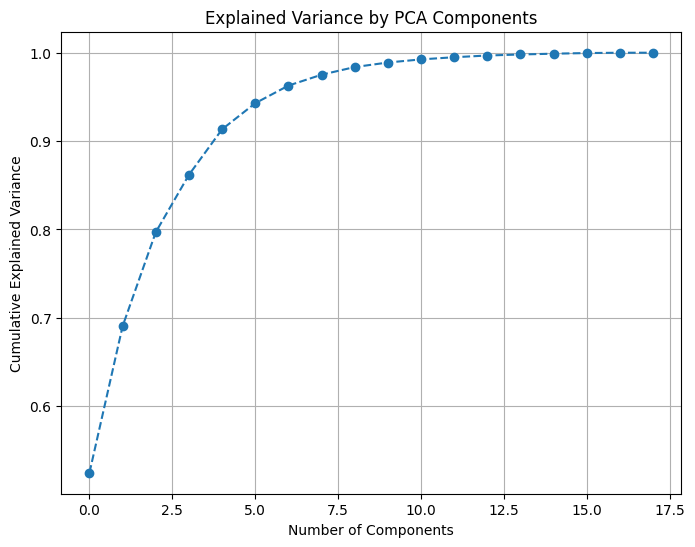

In [ ]:
# initialize the the pca function, fit it on the data and plotting the outcome
pca_full = PCA()

pca_full.fit(X_scaled)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# apply pca with the selected number of components
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_scaled)

/tmp/ipython-input-1389969634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.labels_


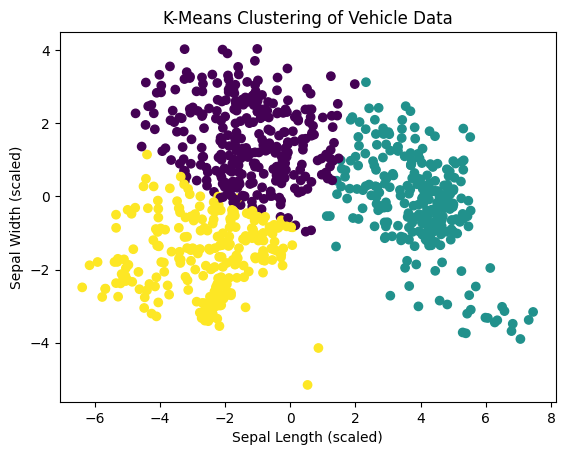

Silhouette Score: 0.29630083701844057


In [ ]:
# apply k-means clustering on the pca-transformed data
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_pca)

df_cleaned['Cluster'] = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Means Clustering of Vehicle Data')
plt.show()

# evaluate clustering quality using the silhouette score
score = silhouette_score(X_pca, df_cleaned['Cluster'])
print(f'Silhouette Score: {score}')